# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

Importing libraries

In [36]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm

Business Problem Understaning

Data Collection

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (32561, 15)
df_train size: (24420, 15)
df_test size: (8141, 15)


In [13]:
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


Data Exploration

In [24]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

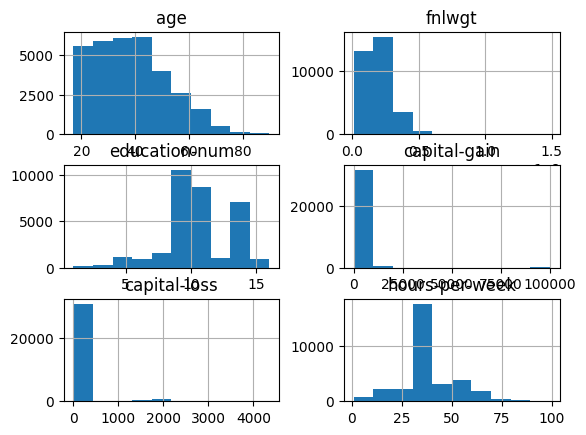

In [14]:
df.hist()

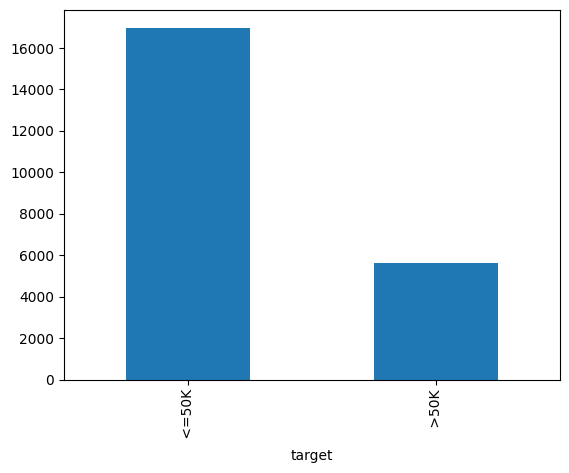

In [48]:
df_bar_target = df_train['target'].value_counts().plot(kind='bar')


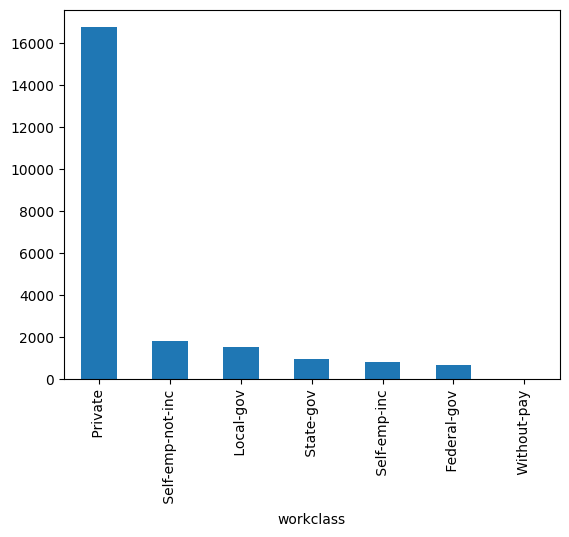

In [49]:
df_bar_workclass = df_train['workclass'].value_counts().plot(kind='bar')

**Data Preprocessing**

In [50]:
df_train = df_train.dropna()
df_test = df_test.dropna()

print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (32561, 15)
df_train size: (22632, 15)
df_test size: (7530, 15)


implicit convert to explicit

In [51]:
df_train = df_train.replace(' ?', pd.NaT)
df_test = df_test.replace(' ?', pd.NaT)

df_train = df_train.dropna()
df_test = df_test.dropna()

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (22632, 15)
df_test size: (7530, 15)


In [52]:
x_train = df_train.drop('target', axis=1)
y_train = df_train['target']
x_test = df_test.drop('target', axis=1)
y_test = df_test['target']

print('x_train size:', x_train.shape)
print('y_train size:', y_train.shape)
print('x_train size:', x_test.shape)
print('y_train size:', y_test.shape)

x_train size: (22632, 14)
y_train size: (22632,)
x_train size: (7530, 14)
y_train size: (7530,)


**Feature Engineering**



In [53]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [55]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns
numerical_attributes = x_train.select_dtypes(include=['int64']).columns

ct = sklearn.compose.ColumnTransformer(
    [
        ('scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes),
        ('encoding', sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
    ]
)

ct.fit(x_train)
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (22632, 103)
y_train size: (22632,)
x_test size: (7530, 103)
y_test size: (7530,)


Model Training

In [56]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

Model Evaluation

In [57]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy

0.8464807436918991